Tests for Annotation module
---

In [1]:
import wsitk_annot as ann
import pandas as pd
import numpy as np
import shapely.geometry as shg

from wsitk_annot import Annotation

In [2]:
a_dot = ann.createEmptyAnnotationObject('DOT')
a_pset = ann.createEmptyAnnotationObject('POINTSET')
a_pline = ann.createEmptyAnnotationObject('POLYLINE')
a_poly = ann.createEmptyAnnotationObject('POLYGON')
a_circ = ann.createEmptyAnnotationObject('CIRCLE')

In [3]:
a_dot.asdict()

{'annotation_type': 'DOT',
 'name': 'DOT',
 'metadata': {'group': ['no_group']},
 'data': [],
 'geom': 'POINT (0 0)'}

In [4]:
a_pset.x

array([0.])

In [5]:
o = ann.Dot((10, 20.5), "another_dot", ['some group'])
print(o.asdict())
o.fromdict(a_dot.asdict())
print(o.asdict())

{'annotation_type': 'DOT', 'name': 'another_dot', 'metadata': {'group': ['some group']}, 'data': [], 'geom': 'POINT (10 20.5)'}
{'annotation_type': 'DOT', 'name': 'DOT', 'metadata': {'group': ['no_group']}, 'data': [], 'geom': 'POINT (0 0)'}


In [6]:
o = ann.Polygon([[0, 1.5], [2.5, 3.0], [4, 6], [0, 1.5]], "poly")
print(o.asdict())
print(o.asGeoJSON())
o.fromdict(a_poly.asdict())
print(o.asdict())

{'annotation_type': 'POLYGON', 'name': 'poly', 'metadata': {'group': ['no_group']}, 'data': [], 'geom': 'POLYGON ((0 1.5, 2.5 3, 4 6, 0 1.5))'}
{"geometry": {"coordinates": [[[0.0, 1.5], [2.5, 3.0], [4.0, 6.0], [0.0, 1.5]]], "type": "Polygon"}, "properties": {"annotation_type": "POLYGON", "data": [], "metadata": {"group": ["no_group"]}, "name": "poly", "object_type": "annotation"}, "type": "Feature"}
{'annotation_type': 'POLYGON', 'name': None, 'metadata': {'group': ['no_group']}, 'data': [], 'geom': 'POLYGON ((0 0, 1 1, 2 2, 0 0))'}


In [7]:
o = ann.Circle([0,1], 2,
               data=pd.DataFrame({
                   'gene': ['g1', 'g2'],
                   'expr': [1, 2.0]
               }))
print(o.asdict())

{'annotation_type': 'CIRCLE', 'name': None, 'metadata': {'group': ['no_group']}, 'data': {'gene': {0: 'g1', 1: 'g2'}, 'expr': {0: 1.0, 1: 2.0}}, 'geom': 'POLYGON ((0 3, 1.414214 2.414214, 2 1, 1.414214 -0.414214, 0 -1, -1.414214 -0.414214, -2 1, -1.414214 2.414214, 0 3))', 'radius': 2, 'center': [0, 1]}


In [8]:
a_pset.asdict()

{'annotation_type': 'POINTSET',
 'name': 'POINTS',
 'metadata': {'group': ['no_group']},
 'data': [],
 'geom': 'MULTIPOINT (0 0)'}

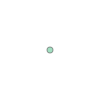

In [9]:
d = a_pset.asdict()
shg.MultiPoint([p for p in zip(a_pset.x, a_pset.y)])

In [10]:
b_pset = ann.createEmptyAnnotationObject('POINTSET')
b_pset.fromdict(a_pset.asdict())

In [11]:
b_pset.asdict()

{'annotation_type': 'POINTSET',
 'name': 'POINTS',
 'metadata': {'group': ['no_group']},
 'data': [],
 'geom': 'MULTIPOINT (0 0)'}

In [12]:
A = ann.Annotation('wsi annot', {'width': 10, 'height': 15}, 0.25)

In [13]:
A.add_annotation_object(a_dot)

In [14]:
A.add_annotations([a_pset, a_poly, a_circ], layer='some layer')

In [15]:
A.asdict()

{'name': 'wsi annot',
 'image_shape': {'width': 10, 'height': 15},
 'mpp': 0.25,
 'annotations': {'base': [{'annotation_type': 'DOT',
    'name': 'DOT',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POINT (0 0)'}],
  'some layer': [{'annotation_type': 'POINTSET',
    'name': 'POINTS',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'MULTIPOINT (0 0)'},
   {'annotation_type': 'POLYGON',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 0, 1 1, 2 2, 0 0))'},
   {'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 1, 0.707107 0.707107, 1 0, 0.707107 -0.707107, 0 -1, -0.707107 -0.707107, -1 0, -0.707107 0.707107, 0 1))',
    'radius': 1.0,
    'center': [0.0, 0.0]}]}}

In [16]:
A.add_annotation_object(o, layer='another layer')

In [17]:
A.asdict()

{'name': 'wsi annot',
 'image_shape': {'width': 10, 'height': 15},
 'mpp': 0.25,
 'annotations': {'base': [{'annotation_type': 'DOT',
    'name': 'DOT',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POINT (0 0)'}],
  'some layer': [{'annotation_type': 'POINTSET',
    'name': 'POINTS',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'MULTIPOINT (0 0)'},
   {'annotation_type': 'POLYGON',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 0, 1 1, 2 2, 0 0))'},
   {'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 1, 0.707107 0.707107, 1 0, 0.707107 -0.707107, 0 -1, -0.707107 -0.707107, -1 0, -0.707107 0.707107, 0 1))',
    'radius': 1.0,
    'center': [0.0, 0.0]}],
  'another layer': [{'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': {'gene': {0: 'g1', 1: 'g2'}, 'expr'

In [32]:
import orjson as json
from pathlib import Path
import zipfile as zip

In [41]:
with zip.ZipFile("./test_01_annot.dbz", mode="w", compression=zip.ZIP_LZMA, compresslevel=9) as zf:
    with zf.open("annot_01.json", "w") as db:
        db.write(
            json.dumps(
                A.asdict(),
                option=json.OPT_NON_STR_KEYS | json.OPT_INDENT_2
            ))
    zf.testzip()

In [28]:
B = ann.Annotation()

In [43]:
with zip.ZipFile("./test_01_annot.dbz", mode="r") as zf:
    zf.testzip()
    with zf.open("annot_01.json", "r") as db:
        B.fromdict(
            json.loads(db.read())
        )

In [44]:
B.asdict()

{'name': 'wsi annot',
 'image_shape': {'width': 10, 'height': 15},
 'mpp': 0.25,
 'annotations': {'base': [{'annotation_type': 'DOT',
    'name': 'DOT',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POINT (0 0)'}],
  'some layer': [{'annotation_type': 'POINTSET',
    'name': 'POINTS',
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'MULTIPOINT (0 0)'},
   {'annotation_type': 'POLYGON',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 0, 1 1, 2 2, 0 0))'},
   {'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': [],
    'geom': 'POLYGON ((0 1, 0.707107 0.707107, 1 0, 0.707107 -0.707107, 0 -1, -0.707107 -0.707107, -1 0, -0.707107 0.707107, 0 1))',
    'radius': 1.0,
    'center': [0.0, 0.0]}],
  'another layer': [{'annotation_type': 'CIRCLE',
    'name': None,
    'metadata': {'group': ['no_group']},
    'data': {'gene': {'0': 'g1', '1': 'g2'}, 'e